In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("property_data.csv")
dataset.head()

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
1,1700000000,110,103,3.0,2,0,0.586065,Banten,Tangerang Selatan,NaN,NaN,NaN
2,3500000000,201,113,3.0,4,1,0.929438,Jakarta,Jakarta Timur,Matraman,NaN,NaN
3,38000000000,600,1028,5.0,4,4,2.932825,Jakarta,Jakarta Pusat,Kemayoran,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN


In [3]:
jatim = dataset[dataset['province'] == 'Jawa Timur']
jatim

,price,buildingSize,landSize,bedRooms,bathRooms,garages,z,province,city,district,latitude,longitude
0,850000000,100,50,3.0,2,0,1.324517,Jawa Timur,Surabaya,Tambaksari,NaN,NaN
4,1800000000,150,180,3.0,2,0,0.586065,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
8,6000000000,350,385,6.0,4,0,1.251784,Jawa Timur,Sidoarjo,Sidoarjo,NaN,NaN
9,1100000000,131,131,3.0,2,0,0.586065,Jawa Timur,Surabaya,NaN,NaN,NaN
15,550000000,70,80,2.0,2,0,1.003556,Jawa Timur,Surabaya,Asemrowo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
594693,550000000,45,92,2.0,1,1,1.166187,Jawa Timur,Malang,Dau,-7.921621,112.570394
594694,2250000000,200,279,3.0,2,0,0.739938,Jawa Timur,Malang,Lowokwaru,-7.932376,112.612110
594695,600000000,150,980,3.0,1,0,2.259864,Jawa Timur,Blitar,Kademangan,-8.145709,112.167985
594704,318000000,48,91,2.0,1,0,1.444679,Jawa Timur,Tuban,Jenu,-6.861966,112.022927


In [4]:
# data = jatim.iloc[:20000]
# data

In [5]:
data = jatim.drop(['z','latitude', 'longitude'], axis=1)
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
0,850000000,100,50,3.0,2,0,Jawa Timur,Surabaya,Tambaksari
4,1800000000,150,180,3.0,2,0,Jawa Timur,Sidoarjo,Sidoarjo
8,6000000000,350,385,6.0,4,0,Jawa Timur,Sidoarjo,Sidoarjo
9,1100000000,131,131,3.0,2,0,Jawa Timur,Surabaya,NaN
15,550000000,70,80,2.0,2,0,Jawa Timur,Surabaya,Asemrowo
...,...,...,...,...,...,...,...,...,...
594693,550000000,45,92,2.0,1,1,Jawa Timur,Malang,Dau
594694,2250000000,200,279,3.0,2,0,Jawa Timur,Malang,Lowokwaru
594695,600000000,150,980,3.0,1,0,Jawa Timur,Blitar,Kademangan
594704,318000000,48,91,2.0,1,0,Jawa Timur,Tuban,Jenu


In [6]:
missing_values = data.isnull().sum()
missing_values

price               0
buildingSize        0
landSize            0
bedRooms            0
bathRooms           0
garages             0
province            0
city                1
district        26608
dtype: int64

In [7]:
data = data.dropna()
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
0,850000000,100,50,3.0,2,0,Jawa Timur,Surabaya,Tambaksari
4,1800000000,150,180,3.0,2,0,Jawa Timur,Sidoarjo,Sidoarjo
8,6000000000,350,385,6.0,4,0,Jawa Timur,Sidoarjo,Sidoarjo
15,550000000,70,80,2.0,2,0,Jawa Timur,Surabaya,Asemrowo
16,1499000000,122,88,3.0,3,0,Jawa Timur,Surabaya,Mulyorejo
...,...,...,...,...,...,...,...,...,...
594693,550000000,45,92,2.0,1,1,Jawa Timur,Malang,Dau
594694,2250000000,200,279,3.0,2,0,Jawa Timur,Malang,Lowokwaru
594695,600000000,150,980,3.0,1,0,Jawa Timur,Blitar,Kademangan
594704,318000000,48,91,2.0,1,0,Jawa Timur,Tuban,Jenu


for column in data.columns:
    plt.figure()
    data[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [8]:
import ydata_profiling as pp

profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data = data[data['bedRooms'] <= 8]
data

,price,buildingSize,landSize,bedRooms,bathRooms,garages,province,city,district
0,850000000,100,50,3.0,2,0,Jawa Timur,Surabaya,Tambaksari
4,1800000000,150,180,3.0,2,0,Jawa Timur,Sidoarjo,Sidoarjo
8,6000000000,350,385,6.0,4,0,Jawa Timur,Sidoarjo,Sidoarjo
15,550000000,70,80,2.0,2,0,Jawa Timur,Surabaya,Asemrowo
16,1499000000,122,88,3.0,3,0,Jawa Timur,Surabaya,Mulyorejo
...,...,...,...,...,...,...,...,...,...
594693,550000000,45,92,2.0,1,1,Jawa Timur,Malang,Dau
594694,2250000000,200,279,3.0,2,0,Jawa Timur,Malang,Lowokwaru
594695,600000000,150,980,3.0,1,0,Jawa Timur,Blitar,Kademangan
594704,318000000,48,91,2.0,1,0,Jawa Timur,Tuban,Jenu


In [10]:
profile = pp.ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

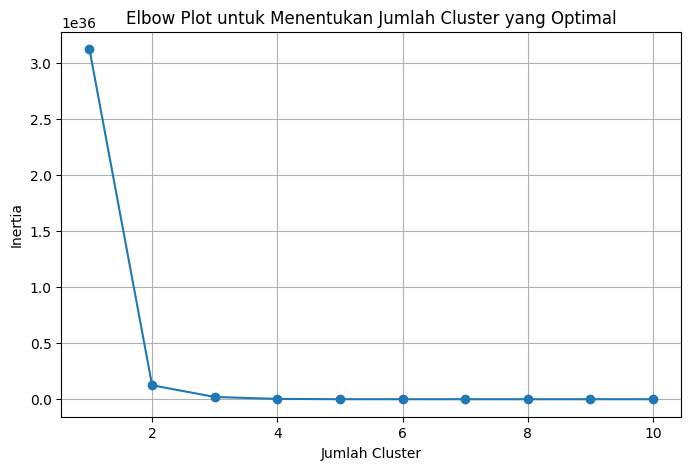

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Menambahkan magic command untuk Jupyter Notebook
%matplotlib inline


# Pilih fitur yang relevan untuk klastering
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menentukan rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(1, 11))

# Menjalankan K-Means untuk setiap jumlah cluster dan menyimpan inertia
inertia = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Membuat elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Plot untuk Menentukan Jumlah Cluster yang Optimal')
plt.grid(True)
plt.show()

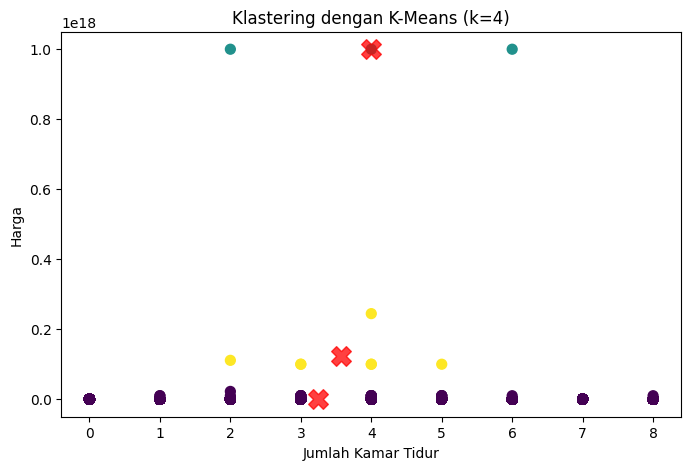

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menjalankan K-Means dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data point
labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan K-Means (k=4)')
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Pilih fitur yang relevan untuk klastering
# Pastikan variabel data sudah didefinisikan sebelumnya
X = data[['bedRooms', 'price', 'buildingSize', 'landSize', 'bathRooms', 'garages']].values

# Menjalankan Agglomerative Clustering dengan jumlah cluster = 3 dan complete linkage
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agglomerative.fit_predict(X)

# Visualisasi hasil klastering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga')
plt.title('Klastering dengan Agglomerative Clustering (k=3, Complete Linkage)')
plt.show()

MemoryError: unable to allocate array data.

In [ ]:
# Mendapatkan label cluster untuk setiap data point
data['cluster'] = labels

# Menghitung rata-rata harga untuk setiap cluster
cluster_avg_price = data.groupby('cluster')['price'].mean()

# Menemukan cluster dengan harga rata-rata terendah
lowest_price_cluster = cluster_avg_price.idxmin()

# Mengambil data dari cluster dengan harga terendah
lowest_price_cluster_data = data[data['cluster'] == lowest_price_cluster]

print("Cluster dengan harga rata-rata terendah:")
print(lowest_price_cluster_data)

Cluster dengan harga rata-rata terendah:
             price  buildingSize  landSize  bedRooms  bathRooms  garages  \
79      3250000000           500       300       5.0          4        0   
106     2900000000           200       201       4.0          6        0   
109      399000000            45        75       2.0          1        0   
115      850000000           160       200       5.0          2        0   
167      440000000            45        78       2.0          1        0   
...            ...           ...       ...       ...        ...      ...   
594674   325000000            34        72       2.0          1        0   
594675   420000000            34        72       2.0          1        0   
594676   433000000             4        86       2.0          1        0   
594681   291000000            36        72       2.0          1        0   
594682   316044950            36        72       2.0          1        0   

           province      city            distr

C:\Users\calys\AppData\Local\Temp\ipykernel_22868\95737414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = labels


In [ ]:
lowest_price_cluster_data.to_csv('data_properti_filtered.csv', index=False)